<p style="font-size: 2em; text-align: center;">Assignment 2: Implementing the A-Star (A*) Search Algorithm in Python</p>
<p style="text-align: center;">Henry Loughlin</p>
<p style="text-align: center;">EAI6000</p>
<p style="text-align: center;">Professor Mark Wagy</p>
<p style="text-align: center;">April 22, 2022</p>

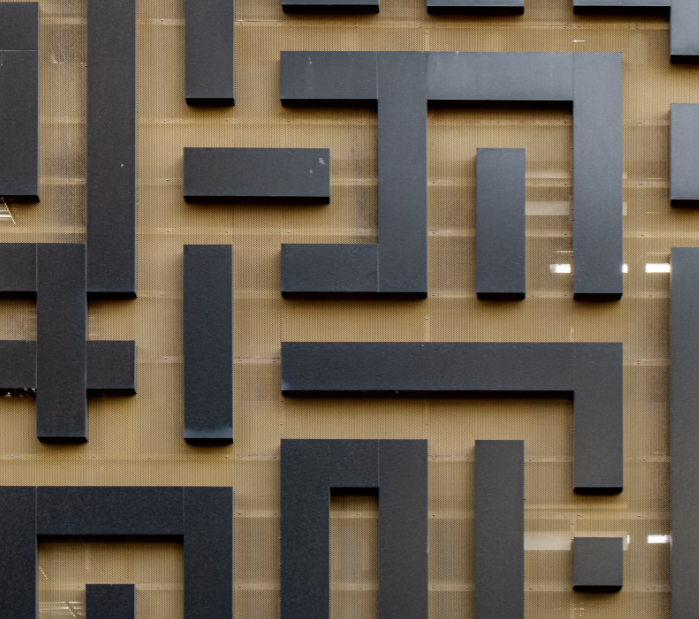

### Describe A* search in your own words. ###

The essential presmise of an A* search algorithm is to find the <b>best result as quickly as possible</b>.
<p>There are two major measures of success with A* are optimality and completeness.</p>
<p><b><u>Optimality:</u></b> Will the algorithm find the best solution available?
<p><b><u>Completeness:</u></b> Given a best solution, will the algorithm find it?

### In A* search, describe the two key elements of f(n) — namely h(n) and g(n). What do they represent in the algorithm and how do they differ? ###
<p><b>g(n):</b> From a given node (the starting position), the exact cost of the path from the given node to n hypothetical node n. Since this is derived from <i>existing information</i>, it is not a heuristic component of our model.
<p><b>h(n):</b> The estimated cost from node n to the target node. Since it is <i>estimated</i>, it is a heuristic component of our model.   

### Examine and run the below code. ###

In [197]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

In [198]:
# Assigning it to a variable isn't necessary to run Node(), but it's clean to refer to a variable.
random_node = Node(parent=2,position=4)

In [199]:
# The result of running random_node.
random_node

In [200]:
# Just to show that instantiating the class with no arguments (and tied to no variable) yields the same construct.
Node()

In [201]:
# Either way, grabbing the hexadecimal representation of the memory address (0x2b0920da2e0).
id(random_node)

2186098597456

<b>In your own words, describe what the purpose of the *Node* class is.</b>
The Node class is a Python object constructor — classes provide a uniform, reproducible blueprint for constructing (and instantiating) objects. The output isn't very telling at first, as instantiating a <b>Node()</b> simply yields the "main" part of the function (featuring the top-level class name) and all we're given otherwise is the memory address. Not much to see here by default, but passing random_node to <b>id()</b> gives us the memory address converted to hexadecimal (not important for our purposes, but interesting anyway).

<b>Why do we have to initialize a parent and a position?</b> The parent node is the node that was previously visited. The position shows the given position within the maze. The object constructor thus uses "self" (referring to the given object to be constructed) in self.parent=parent and self.position=position to tell the Node to assign values to parent and position in the new object (by default None).

## [Activity - Run astar() ]

In [202]:
def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            if child in closed_list:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


<b>What type of input should value of *maze* be?</b>

<b>Maze</b> should be a matrix (binary in nature) — we will use a list of lists, although some might choose tuples or arrays (often all located within a singular list). 0s represent usable nodes for our path while 1s represent unusable nodes. Given a 0 node, we can reach any other 0 node that is adjacent horizontally, vertically, or diagonally.

<b>Start</b> and <b>End</b>, meanwhile, should be two-element tuples of numbers (matrix,element) corresponding to the start and end positions within the maze — it is important to note that Python has a zero-based index, meaning the first element in a list is element 0. In order for the A* algorithm to be able to solve it, <b><i>both</i></b> tuples must represent "0" locations in the matrix (because 1s are not workable as path or start/end points)<i><b>and</b></i> there must be a workable path (horizontally, vertiaclly, diagonally) between the tuples.


<b>Please use the above code that uses the astar() function to define a path from the beginning to the end of a maze. You can choose how the maze looks and where the start and end are.</b>

A simple run from one end (0,0) to the other (9,9).

In [203]:
# This maze is a monster matrix - 10x10.
maze = [[0,0,0,1,0,1,0,1,0,1],
        [0,1,0,1,1,0,1,1,0,1],
        [1,1,0,0,0,1,1,0,1,1],
        [0,1,0,1,1,0,1,1,0,1],
        [0,1,0,1,0,0,0,1,1,0],
        [1,0,0,0,0,1,1,0,0,0],
        [1,0,1,0,0,0,0,1,0,0],
        [0,1,0,0,0,0,1,0,0,1],
        [1,0,0,1,1,0,0,0,1,0],
        [0,1,0,1,1,0,1,1,0,0]]

# Position of the start tile.
start = (0,0)

# Position of the end tile.
end = (9,9)

In [204]:
# Giving the A* for maze its own variable.
maze_path = astar(maze,start,end)

In [205]:
# Full path.
maze_path

[(0, 0),
 (0, 1),
 (1, 2),
 (2, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9),
 (9, 9)]

It would be quickest to go diagonally the whole way (nine changes of state), but there are a fair number of 1s (placed arbitrarily if not stochastically) placed throughout the maze. As such, we make seven diagonal moves, three lateral moves and one vertical move, totaling 11 moves — two more than the best case scenario, but still not bad.

<b>Now create a maze that the algorithm cannot solve. What is the output of the algorithm?</b>

In [206]:
# The second maze - this is 3x7.
maze_two = [[0,1,1,1,1,1,0],
            [0,1,0,1,0,0,1],
            [0,0,1,1,0,1,0]]

# Second start position.
start_two = (0,0)

# Second end position.
end_two = (2,6)

In [207]:
# The second run.
maze_two_path = astar(maze_two, start_two, end_two)

In [208]:
# No output!
maze_two_path

The algorithm outputs nothing (signified as <b>None</b> in Python) because it does not have any operation (or error message) to return an error in the case that there is no viable path from start to end. If we altered the code to include an assertion that there was workable a path, the alternate output could be an AssertionError which would tell the user that there was no workable path.

<b>For fun, we'll run <b>assert</b> commands on the existence of both paths.</b> This would be more efficient inserted into the actual function, but this is purely for demonstration.

In [209]:
# A function to exert the existence of the path (or lack thereof).
def assert_path(maze, start, end, path):
    try:
        assert path is not None
        print(f"There is a path from {start} to {end}!")
        print(f"Full path: {path}")
    except AssertionError:
        print("There is no path!")

In [210]:
# First path!
assert_path(maze, start, end, maze_path)

There is a path from (0, 0) to (9, 9)!
Full path: [(0, 0), (0, 1), (1, 2), (2, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 8), (8, 9), (9, 9)]


In [211]:
assert_path(maze_two, start_two, end_two, maze_two_path)

There is no path!
